# Multi-Step MLP Models

references :

- How to Develop Multilayer Perceptron Models for Time Series Forecasting

  https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/
  


- Exploratory Configuration of a Multilayer Perceptron Network for Time Series Forecasting 

  https://machinelearningmastery.com/exploratory-configuration-multilayer-perceptron-network-time-series-forecasting/  


# Example case

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib

##### transform the data

In [21]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


##### build model 

In [22]:
# define model
model = Sequential()

# hidden layer, 100 neurons, relu activation function
model.add(Dense(100, activation='relu', input_dim=n_steps)) 

# output layer
model.add(Dense(n_steps_out))

# loss function
model.compile(optimizer='adam', loss='mse')

##### fit model

In [23]:
# fit model
model.fit(X, y, epochs=2000, verbose=0)

In [24]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.38835 113.17945]]


##### calculate MSE

In [27]:
# calculate the MSE

y_test = array([100, 110])
mse = mean_squared_error([y_test], yhat)
mse

6.018214156065369

# Web traffic case

In [1]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

/home/irza/anaconda3/envs/deeplearning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##### read dataset

In [3]:
wt_df = read_csv('train_2.csv', nrows=1)
wt_df

Page  2015-07-01  2015-07-02  \
0  2NE1_zh.wikipedia.org_all-access_spider          18          11   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0           5          13          14           9           9          22   

   2015-07-09     ...      2017-09-01  2017-09-02  2017-09-03  2017-09-04  \
0          26     ...              19          33          33          18   

   2017-09-05  2017-09-06  2017-09-07  2017-09-08  2017-09-09  2017-09-10  
0          16          27          29          23          54          38  

[1 rows x 804 columns]

##### select and transform dataframe row to sequence

The dataframe is converted to sequence or array format 

In [3]:
# take only the values without the page name

def get_seq_by_row(input_df, row_num):
    new_seq = np.delete(input_df.iloc[row_num].values, 0)
    return new_seq

wt_seq = get_seq_by_row(wt_df,0)

In [5]:
wt_seq

array([18, 11, 5, 13, 14, 9, 9, 22, 26, 24, 19, 10, 14, 15, 8, 16, 8, 8,
       16, 7, 11, 10, 20, 18, 15, 14, 49, 10, 16, 18, 8, 5, 9, 7, 13, 9,
       7, 4, 11, 10, 5, 9, 9, 9, 9, 13, 4, 15, 25, 9, 5, 6, 20, 3, 14, 46,
       5, 5, 13, 4, 9, 10, 9, 11, 11, 11, 9, 15, 5, 10, 7, 4, 8, 9, 10, 6,
       13, 16, 6, 24, 9, 11, 12, 8, 14, 6, 6, 11, 14, 6, 10, 20, 7, 15, 8,
       15, 5, 8, 8, 5, 11, 165, 34, 6, 13, 8, 9, 11, 26, 18, 3, 5, 12, 6,
       16, 19, 9, 10, 11, 11, 7, 9, 10, 24, 6, 6, 8, 16, 13, 10, 10, 6, 5,
       20, 6, 47, 9, 9, 12, 11, 17, 15, 14, 11, 97, 11, 12, 11, 14, 15,
       12, 104, 5, 22, 45, 75, 29, 34, 20, 12, 25, 9, 62, 20, 19, 8, 23,
       13, 16, 34, 36, 11, 18, 12, 24, 30, 27, 44, 35, 53, 11, 26, 13, 18,
       9, 16, 6, 19, 20, 19, 22, 30, 14, 16, 22, 15, 15, 26, 16, 13, 27,
       18, 13, 32, 31, 16, 38, 18, 9, 14, 10, 24, 8, 15, 18, 10, 23, 17,
       11, 26, 14, 8, 12, 9, 11, 34, 17, 29, 11, 9, 14, 21, 12, 11, 13,
       11, 13, 16, 13, 19, 21, 14, 11, 35,

#### time lag parameter

The following are the hyperparameter:
    - time_step_lag : the number of NN input values  
    - time_step_ahead : the number of NN output values, which means the number of days to predict

In [63]:
time_step_lag = 7 # input of NN
time_step_ahead = 30 # number of day to be predicted

#### split train and test set

The series is splitted into train and test set. 

The size of the train set is the original size subtracted by the time_step_head. The values are taken from the first values of the original series with the previouly mentioned size. The format of the train set is still a sequence.

The test set is output in format of 2-dimention array with only one array entry, which holds the test set values. The values contains the input and the output values for the neural network and the size respectively is the same as time_step_lag and time_step_ahead. The input values are taken from the last values of the train set with already mentioned size and the output values are the remaining values of the original series after taking out the train set.


In [31]:
def split_train_and_test_set(data_seq, time_step_lag, time_step_ahead):
    train_seq = data_seq[:-time_step_ahead]
    test_set = np.array([data_seq[-(time_step_lag + time_step_ahead):]])
    return train_seq, test_set

In [65]:
train_seq, test = split_train_and_test_set(wt_seq, time_step_lag, time_step_ahead)

In [66]:
train_seq

array([18, 11, 5, 13, 14, 9, 9, 22, 26, 24, 19, 10, 14, 15, 8, 16, 8, 8,
       16, 7, 11, 10, 20, 18, 15, 14, 49, 10, 16, 18, 8, 5, 9, 7, 13, 9,
       7, 4, 11, 10, 5, 9, 9, 9, 9, 13, 4, 15, 25, 9, 5, 6, 20, 3, 14, 46,
       5, 5, 13, 4, 9, 10, 9, 11, 11, 11, 9, 15, 5, 10, 7, 4, 8, 9, 10, 6,
       13, 16, 6, 24, 9, 11, 12, 8, 14, 6, 6, 11, 14, 6, 10, 20, 7, 15, 8,
       15, 5, 8, 8, 5, 11, 165, 34, 6, 13, 8, 9, 11, 26, 18, 3, 5, 12, 6,
       16, 19, 9, 10, 11, 11, 7, 9, 10, 24, 6, 6, 8, 16, 13, 10, 10, 6, 5,
       20, 6, 47, 9, 9, 12, 11, 17, 15, 14, 11, 97, 11, 12, 11, 14, 15,
       12, 104, 5, 22, 45, 75, 29, 34, 20, 12, 25, 9, 62, 20, 19, 8, 23,
       13, 16, 34, 36, 11, 18, 12, 24, 30, 27, 44, 35, 53, 11, 26, 13, 18,
       9, 16, 6, 19, 20, 19, 22, 30, 14, 16, 22, 15, 15, 26, 16, 13, 27,
       18, 13, 32, 31, 16, 38, 18, 9, 14, 10, 24, 8, 15, 18, 10, 23, 17,
       11, 26, 14, 8, 12, 9, 11, 34, 17, 29, 11, 9, 14, 21, 12, 11, 13,
       11, 13, 16, 13, 19, 21, 14, 11, 35,

In [70]:
test

array([[18, 11, 5, 13, 14, 9, 9, 22, 26, 24, 19, 10, 14, 15, 8, 16, 8, 8,
        16, 7, 11, 10, 20, 18, 15, 14, 49, 10, 16, 18, 8, 5, 9, 7, 13, 9,
        7]], dtype=object)

##### transform sequence to supervised format

the train set is converted into multiple sequences or array with each array has the size of combination of time_step_lag and time_step_ahead. 

Each sequence is formed by moving window scanning from first values of the train set series. 

The moving window has the size of the required array size and it shifts by 1 to form the next array. 

In [5]:
# frame a sequence as a supervised learning problem

def timeseries_to_supervised(data, lag=1, stepahead=1):
    df = DataFrame(data)
    col_num = lag+stepahead
    columns = [df.shift(i) for i in range(1, col_num)]
    columns = list(reversed(columns))
    columns.append(df)
    df = concat(columns, axis=1)    
    return df.values[col_num - 1:,:]

In [71]:
wt_supervised = timeseries_to_supervised(train_seq, time_step_lag, time_step_ahead)
wt_supervised

array([[18, 11, 5, ..., 13, 9, 7],
       [11, 5, 13, ..., 9, 7, 4],
       [5, 13, 14, ..., 7, 4, 11],
       ...,
       [15, 14, 15, ..., 25, 45, 39],
       [14, 15, 19, ..., 45, 39, 17],
       [15, 19, 29, ..., 39, 17, 18]], dtype=object)

#### split train and validation set

From the reformated train set above, validation set is built by subtracting n number of array from the last entries

In [6]:
def split_train_and_validation_set(dataset, num_of_test_set=12):
    num_of_test_set = -1 * num_of_test_set
    return dataset[0:num_of_test_set], dataset[num_of_test_set:]    

In [73]:
train, validation = split_train_and_validation_set(wt_supervised)

In [74]:
validation

array([[23, 23, 32, 34, 21, 24, 23, 24, 26, 15, 14, 15, 19, 29, 22, 25,
        20, 19, 25, 17, 12, 24, 38, 43, 17, 16, 16, 12, 20, 16, 31, 19,
        14, 20, 13, 22, 14],
       [23, 32, 34, 21, 24, 23, 24, 26, 15, 14, 15, 19, 29, 22, 25, 20,
        19, 25, 17, 12, 24, 38, 43, 17, 16, 16, 12, 20, 16, 31, 19, 14,
        20, 13, 22, 14, 20],
       [32, 34, 21, 24, 23, 24, 26, 15, 14, 15, 19, 29, 22, 25, 20, 19,
        25, 17, 12, 24, 38, 43, 17, 16, 16, 12, 20, 16, 31, 19, 14, 20,
        13, 22, 14, 20, 46],
       [34, 21, 24, 23, 24, 26, 15, 14, 15, 19, 29, 22, 25, 20, 19, 25,
        17, 12, 24, 38, 43, 17, 16, 16, 12, 20, 16, 31, 19, 14, 20, 13,
        22, 14, 20, 46, 24],
       [21, 24, 23, 24, 26, 15, 14, 15, 19, 29, 22, 25, 20, 19, 25, 17,
        12, 24, 38, 43, 17, 16, 16, 12, 20, 16, 31, 19, 14, 20, 13, 22,
        14, 20, 46, 24, 22],
       [24, 23, 24, 26, 15, 14, 15, 19, 29, 22, 25, 20, 19, 25, 17, 12,
        24, 38, 43, 17, 16, 16, 12, 20, 16, 31, 19, 14, 20, 13,

#### scale sequence value

All the values are scaled into the range of -1 to 1. 

The scaler is built by fitting the train set on each value index or each variable.

The scaler is then used to scale validation set values and test set values.

In [7]:
# scale train and test data to [-1, 1]

def scale(train, test):
    
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)

    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    
    return scaler, train_scaled, test_scaled

def scale_with_scaler(scaler, data):
    
    # transform data
    data = data.reshape(data.shape[0], data.shape[1])
    data_scaled = scaler.transform(data)
    
    return data_scaled

In [76]:
scaler, train_scaled, validation_scaled = scale(train, validation)

/home/irza/anaconda3/envs/deeplearning/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [77]:
validation_scaled

array([[-0.91786448, -0.91786448, -0.88090349, -0.87268994, -0.92607803,
        -0.9137577 , -0.91786448, -0.9137577 , -0.90554415, -0.95071869,
        -0.95482546, -0.95071869, -0.93429158, -0.89322382, -0.92197125,
        -0.90965092, -0.9301848 , -0.93429158, -0.90965092, -0.94250513,
        -0.96303901, -0.9137577 , -0.85626283, -0.83572895, -0.94250513,
        -0.94661191, -0.94661191, -0.96303901, -0.9301848 , -0.94661191,
        -0.88501027, -0.93429158, -0.95482546, -0.9301848 , -0.95893224,
        -0.92197125, -0.95482546],
       [-0.91786448, -0.88090349, -0.87268994, -0.92607803, -0.9137577 ,
        -0.91786448, -0.9137577 , -0.90554415, -0.95071869, -0.95482546,
        -0.95071869, -0.93429158, -0.89322382, -0.92197125, -0.90965092,
        -0.9301848 , -0.93429158, -0.90965092, -0.94250513, -0.96303901,
        -0.9137577 , -0.85626283, -0.83572895, -0.94250513, -0.94661191,
        -0.94661191, -0.96303901, -0.9301848 , -0.94661191, -0.88501027,
        -0.93429

In [78]:
validation_scaled[:,0:-1]

array([[-0.91786448, -0.91786448, -0.88090349, -0.87268994, -0.92607803,
        -0.9137577 , -0.91786448, -0.9137577 , -0.90554415, -0.95071869,
        -0.95482546, -0.95071869, -0.93429158, -0.89322382, -0.92197125,
        -0.90965092, -0.9301848 , -0.93429158, -0.90965092, -0.94250513,
        -0.96303901, -0.9137577 , -0.85626283, -0.83572895, -0.94250513,
        -0.94661191, -0.94661191, -0.96303901, -0.9301848 , -0.94661191,
        -0.88501027, -0.93429158, -0.95482546, -0.9301848 , -0.95893224,
        -0.92197125],
       [-0.91786448, -0.88090349, -0.87268994, -0.92607803, -0.9137577 ,
        -0.91786448, -0.9137577 , -0.90554415, -0.95071869, -0.95482546,
        -0.95071869, -0.93429158, -0.89322382, -0.92197125, -0.90965092,
        -0.9301848 , -0.93429158, -0.90965092, -0.94250513, -0.96303901,
        -0.9137577 , -0.85626283, -0.83572895, -0.94250513, -0.94661191,
        -0.94661191, -0.96303901, -0.9301848 , -0.94661191, -0.88501027,
        -0.93429158, -0.95482

In [85]:
test_scaled = scale_with_scaler(scaler, test)

In [86]:
test_scaled

array([[-0.93839836, -0.96714579, -0.99178645, -0.95893224, -0.95482546,
        -0.97535934, -0.97535934, -0.92197125, -0.90554415, -0.9137577 ,
        -0.93429158, -0.97125257, -0.95482546, -0.95071869, -0.97946612,
        -0.94661191, -0.97946612, -0.97946612, -0.94661191, -0.9835729 ,
        -0.96714579, -0.97125257, -0.9301848 , -0.93839836, -0.95071869,
        -0.95482546, -0.8110883 , -0.97125257, -0.94661191, -0.93839836,
        -0.97946612, -0.99178645, -0.97535934, -0.9835729 , -0.95893224,
        -0.97535934, -0.9835729 ]])

#### build model

the model has only one hidden layer with variable number of neuron and uses relu as activation function.

the output layer uses the value of time_step_ahead to determine the number of output values.

the loss function measures the MSE to calculate the error and optimizes the parameter using the adam optimizer.

the model is packed in a function with input parameter of train set, batch size, number of epoch, neurons, time_step_ahead

In [8]:
# fit an MLP network to training data

def fit_model(train, batch_size, nb_epoch, neurons, time_step_ahead):
    
    X, y = train[:, 0:-time_step_ahead], train[:, -time_step_ahead:]

    model = Sequential()
    
    # hidden layer
    model.add(Dense(neurons, activation='relu', input_dim=X.shape[1]))
    
    # output layer
    model.add(Dense(time_step_ahead))
    
    # loss function
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # model fitting
    #model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=0, shuffle=False)
    model.fit(X, y, epochs=nb_epoch, verbose=0, shuffle=False)
    
    return model

#### fit model 

setting the hyperparameter of the NN model

In [80]:
batch_size = 4
epochs = 1000
neurons = 3

In [81]:
model = fit_model(train_scaled, batch_size, epochs, neurons, time_step_ahead)

#### make forecasting

prediction is done by calling the evaluate method, which uses the fitted model to predict the given input values

In [9]:
def evaluate(model, scaled_input, time_step_ahead):
    
    eval_input = scaled_input[:,0:-time_step_ahead]
    
    output = model.predict(eval_input)
    
    return output

In [88]:
train_output = evaluate(model, train_scaled, time_step_ahead)
train_output

array([[-0.9231054 , -0.9196058 , -0.9167666 , ..., -0.91641736,
        -0.9156091 , -0.91685784],
       [-0.9235348 , -0.9223388 , -0.91842407, ..., -0.9191259 ,
        -0.91865456, -0.91842294],
       [-0.9256692 , -0.9261788 , -0.92129964, ..., -0.9226813 ,
        -0.92257774, -0.92114127],
       ...,
       [-0.9031697 , -0.90312445, -0.9005773 , ..., -0.90292   ,
        -0.901276  , -0.90153635],
       [-0.8985533 , -0.9016261 , -0.89810425, ..., -0.9021514 ,
        -0.9006248 , -0.89919245],
       [-0.89861435, -0.90082675, -0.89768606, ..., -0.9013286 ,
        -0.8996906 , -0.898798  ]], dtype=float32)

In [89]:
validation_output = evaluate(model, validation_scaled, time_step_ahead)
validation_output

array([[-0.9017276 , -0.9036307 , -0.9003409 , -0.90104276, -0.905036  ,
        -0.90273565, -0.90236574, -0.9018505 , -0.90504575, -0.90442586,
        -0.9032526 , -0.9042348 , -0.90400726, -0.9038842 , -0.9046252 ,
        -0.9027903 , -0.90104795, -0.9028573 , -0.9030912 , -0.9017252 ,
        -0.90191483, -0.90362453, -0.9025995 , -0.90453535, -0.9014543 ,
        -0.90525806, -0.9013932 , -0.90367043, -0.9021938 , -0.9013102 ],
       [-0.90779984, -0.9087459 , -0.90532446, -0.90608966, -0.90912664,
        -0.90710896, -0.9066379 , -0.90631217, -0.9082931 , -0.90812135,
        -0.90712595, -0.90769434, -0.90779316, -0.90755737, -0.90839064,
        -0.9068943 , -0.9055877 , -0.9068743 , -0.9070625 , -0.9058186 ,
        -0.9059918 , -0.9074874 , -0.90667284, -0.90793157, -0.9059998 ,
        -0.9085103 , -0.9062366 , -0.9078784 , -0.90666914, -0.90602636],
       [-0.90442085, -0.90159124, -0.9001802 , -0.9019479 , -0.90584254,
        -0.90501523, -0.9043555 , -0.8981645 , -0

In [90]:
test_output = evaluate(model, test_scaled, time_step_ahead)
test_output

array([[-0.9231054 , -0.9196058 , -0.9167666 , -0.9181814 , -0.918962  ,
        -0.91829276, -0.91745114, -0.9148842 , -0.9156913 , -0.91531146,
        -0.9143823 , -0.9153595 , -0.9149873 , -0.9154924 , -0.91580653,
        -0.9144912 , -0.91626346, -0.9157208 , -0.9159921 , -0.9153495 ,
        -0.91463536, -0.91543806, -0.91515994, -0.9150144 , -0.9142649 ,
        -0.9152949 , -0.9155713 , -0.91641736, -0.9156091 , -0.91685784]],
      dtype=float32)

#### invert scale the prediction

using the scaler above to invert back all the predicted values.

the predicted values must be set together with the input values in order to be inverted.

In [10]:
# inverse scaling for a forecasted value

def invert_scale(scaler, X, yhat):    
    new_row = [x for x in X] + [x for x in yhat]    
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    
    return inverted[0, -len(yhat):]

def invert_scale_prediction(scaler, scaled_set, scaled_output):
    scaled_input = scaled_set[:,0:-time_step_ahead]
    predictions = list()

    for i in range(len(scaled_output)):
        yhat = scaled_output[i]
        X = scaled_input[i]

        # invert scaling
        yhat = invert_scale(scaler, X, yhat)    

        # store forecast
        predictions.append(yhat)
    
    return predictions

In [92]:
train_unscaled_output = invert_scale_prediction(scaler, train_scaled, train_output)
train_unscaled_output

[array([21.72383055, 22.57598975, 23.26733682, 22.92282438, 22.73275256,
        22.89571273, 23.10064662, 23.72569495, 23.52916452, 23.62166053,
        23.84791508, 23.60996246, 23.7005862 , 23.57759684, 23.50110948,
        23.8213985 , 23.38984722, 23.52198023, 23.45592824, 23.61240077,
        23.78628978, 23.59083337, 23.65855443, 23.69399697, 23.87649262,
        23.62569535, 23.55839518, 23.35237277, 23.54917896, 23.24511629]),
 array([21.61927363, 21.91050616, 22.86373898, 22.65722311, 22.52725264,
        22.86594507, 23.03980505, 22.88964599, 23.24970263, 22.95472556,
        23.06948563, 23.25086373, 22.96854264, 23.1384694 , 22.84703368,
        22.97057456, 23.0938687 , 23.08976132, 23.08079183, 23.31849772,
        23.25248927, 23.01720718, 23.08293986, 23.21600175, 22.89188111,
        23.16845477, 22.65906635, 22.6928398 , 22.80761439, 22.86401474]),
 array([21.09955144, 20.97545904, 22.16353855, 22.07139087, 22.06082487,
        22.53086656, 22.68508947, 21.85396066, 

In [93]:
validation_unscaled_output = invert_scale_prediction(scaler, validation_scaled, validation_output)
validation_unscaled_output

[array([26.92932531, 26.46593091, 27.26698726, 27.09608808, 26.12374067,
        26.68386909, 26.77394131, 26.899398  , 26.12136042, 26.27230322,
        26.5579915 , 26.31881973, 26.37423316, 26.40420401, 26.22376931,
        26.67056   , 27.09482539, 26.65424657, 26.59729469, 26.92992038,
        26.88373768, 26.46742582, 26.71701846, 26.2456415 , 26.99587077,
        26.06966251, 27.01076186, 26.45625025, 26.81581342, 27.03096497]),
 array([25.45073897, 25.22037703, 26.05349422, 25.86716694, 25.12766331,
        25.61896762, 25.73366964, 25.81298718, 25.33062333, 25.3724519 ,
        25.61483121, 25.47642827, 25.4523645 , 25.50978082, 25.30687886,
        25.67123157, 25.98940158, 25.67610818, 25.63028833, 25.93317538,
        25.89099848, 25.52681994, 25.72516459, 25.41866362, 25.88905364,
        25.27773529, 25.83139059, 25.43160987, 25.72606444, 25.88258052]),
 array([26.27352238, 26.96253273, 27.30611628, 26.87568256, 25.92734087,
        26.12879145, 26.28942943, 27.79694164, 

In [94]:
test_unscaled_output = invert_scale_prediction(scaler, test_scaled, test_output)
test_unscaled_output

[array([21.72383055, 22.57598975, 23.26733682, 22.92282438, 22.73275256,
        22.89571273, 23.10064662, 23.72569495, 23.52916452, 23.62166053,
        23.84791508, 23.60996246, 23.7005862 , 23.57759684, 23.50110948,
        23.8213985 , 23.38984722, 23.52198023, 23.45592824, 23.61240077,
        23.78628978, 23.59083337, 23.65855443, 23.69399697, 23.87649262,
        23.62569535, 23.55839518, 23.35237277, 23.54917896, 23.24511629])]

#### calculate root mean squared error

In [11]:
def calculate_rmse(original, prediction, time_step_ahead):
    
    test_output = original[:,-time_step_ahead:]
    rmse = sqrt(mean_squared_error(test_output, prediction))
    
    return rmse

In [96]:
train_rmse = calculate_rmse(train, train_unscaled_output, time_step_ahead)

print('Train RMSE: %.3f' % (train_rmse))

Train RMSE: 27.216


In [97]:
validation_rmse = calculate_rmse(validation, validation_unscaled_output, time_step_ahead)

print('Validation RMSE: %.3f' % (validation_rmse))

Validation RMSE: 9.611


In [98]:
test_rmse = calculate_rmse(test, test_unscaled_output, time_step_ahead)

print('Test RMSE: %.3f' % (test_rmse))

Test RMSE: 12.402


#### vary the time step lag

In [101]:
# config

# time_step_lag = 2
time_step_lag_array = np.arange(45,51)

time_step_ahead = 30



batch_size = 4
epochs = 2000
neurons = 20



train_rmse_array = []
validation_rmse_array = []

for time_step_lag in time_step_lag_array:

    # split train - test set
    train_seq, test = split_train_and_test_set(wt_seq, time_step_lag, time_step_ahead)
    
    # tranform data to NN input format
    wt_supervised = timeseries_to_supervised(train_seq, time_step_lag, time_step_ahead)

    # split train and test set
    train, validation = split_train_and_validation_set(wt_supervised)

    # scale dataset
    scaler, train_scaled, validation_scaled = scale(train, validation)
    
    # fit model
    model = fit_model(train_scaled, batch_size, epochs, neurons, time_step_ahead)

    # evaluate train set
    train_output = evaluate(model, train_scaled, time_step_ahead)
    train_unscaled_output = invert_scale_prediction(scaler, train_scaled, train_output)
    train_rmse = calculate_rmse(train, train_unscaled_output, time_step_ahead)
    train_rmse_array.append(train_rmse)
    
    # evaluate test set
    validation_output = evaluate(model, validation_scaled, time_step_ahead)
    validation_unscaled_output = invert_scale_prediction(scaler, validation_scaled, validation_output)
    validation_rmse = calculate_rmse(validation, validation_unscaled_output, time_step_ahead)
    validation_rmse_array.append(validation_rmse)
    
    print('%d) TrainRMSE=%f, ValidationRMSE=%f' % (time_step_lag, train_rmse, validation_rmse))

/home/irza/anaconda3/envs/deeplearning/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


20) TrainRMSE=27.569965, ValidationRMSE=11.159315
20) TrainRMSE=27.726304, ValidationRMSE=10.770807
20) TrainRMSE=27.656470, ValidationRMSE=11.083786
20) TrainRMSE=27.631849, ValidationRMSE=10.911649
20) TrainRMSE=27.619817, ValidationRMSE=11.087398
20) TrainRMSE=27.546222, ValidationRMSE=10.879713


In [58]:
#x = []
#x.append(2)
#x.append(4)
#print(x)
print([round(x,2) for x in train_rmse_array])
print([round(x,2) for x in validation_rmse_array])
#print(len(test_unscaled_output))

print(len(test))



[26.78, 26.83, 26.82, 26.92, 26.92, 26.92]
[12.62, 12.59, 12.72, 12.51, 12.55, 12.64]
12


#### plot RMSE

<IPython.core.display.Javascript object>


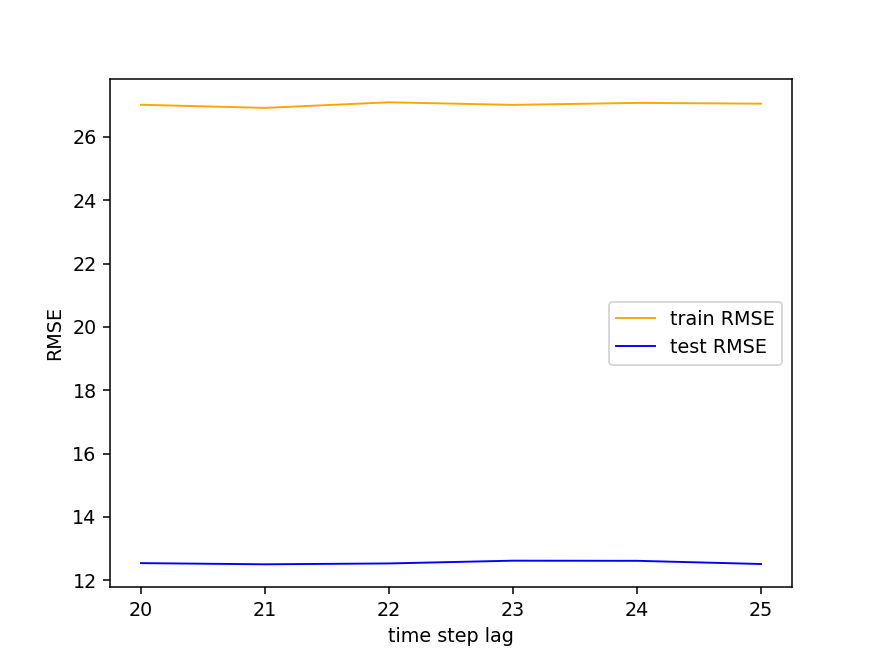

In [49]:
%matplotlib notebook

plt.ylabel('RMSE')
plt.xlabel('time step lag')
plt.plot(time_step_lag_array, train_rmse_array, '-', linewidth=1, color='orange', label='train RMSE')
plt.plot(time_step_lag_array, validation_rmse_array, '-', linewidth=1, color='blue', label='validation RMSE')  
plt.legend(loc='right')
plt.show()

#### vary the hidden layer neuron

In [100]:
# config

time_step_lag = 26
# time_step_lag_array = np.arange(20,26)

time_step_ahead = 30

# split train - test set
train_seq, test = split_train_and_test_set(wt_seq, time_step_lag, time_step_ahead)



batch_size = 4
epochs = 2000

# neurons = 20
neurons_array = np.arange(20,26)



train_rmse_array = []
validation_rmse_array = []

for neurons in neurons_array:

    # tranform data to NN input format
    wt_supervised = timeseries_to_supervised(train_seq, time_step_lag, time_step_ahead)

    # split train and test set
    train, validation = split_train_and_validation_set(wt_supervised)

    # scale dataset
    scaler, train_scaled, validation_scaled = scale(train, validation)
    
    # fit model
    model = fit_model(train_scaled, batch_size, epochs, neurons, time_step_ahead)

    # evaluate train set
    train_output = evaluate(model, train_scaled, time_step_ahead)
    train_unscaled_output = invert_scale_prediction(scaler, train_scaled, train_output)
    train_rmse = calculate_rmse(train, train_unscaled_output, time_step_ahead)
    train_rmse_array.append(train_rmse)
    
    # evaluate test set
    validation_output = evaluate(model, validation_scaled, time_step_ahead)
    validation_unscaled_output = invert_scale_prediction(scaler, validation_scaled, validation_output)
    validation_rmse = calculate_rmse(validation, validation_unscaled_output, time_step_ahead)
    validation_rmse_array.append(validation_rmse)
    
    print('%d) TrainRMSE=%f, ValidationRMSE=%f' % (neurons, train_rmse, validation_rmse))    

/home/irza/anaconda3/envs/deeplearning/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


20) TrainRMSE=27.318163, ValidationRMSE=10.931195
21) TrainRMSE=27.406987, ValidationRMSE=11.265284
22) TrainRMSE=27.291014, ValidationRMSE=11.023077
23) TrainRMSE=27.321107, ValidationRMSE=11.366379
24) TrainRMSE=27.313561, ValidationRMSE=10.987720
25) TrainRMSE=27.336755, ValidationRMSE=11.544686


#### plot rmse

In [ ]:
%matplotlib notebook

plt.ylabel('RMSE')
plt.xlabel('time step lag')
plt.plot(time_step_lag_array, train_rmse_array, '-', linewidth=1, color='orange', label='train RMSE')
plt.plot(time_step_lag_array, validation_rmse_array, '-', linewidth=1, color='blue', label='validation RMSE')  
plt.legend(loc='right')
plt.show()

## use smoothed dataset from R
#### read dataset from R

In R the dataset is already smoothed using moving average

In [2]:
wt_df = read_csv('data.csv')
wt_df

Unnamed: 0        Date  Clicks  Clean.clicks  Clicks.MA7  Clicks.MA30
0             1  2015-07-01      18          18.0         NaN          NaN
1             2  2015-07-02      11          11.0         NaN          NaN
2             3  2015-07-03       5           5.0         NaN          NaN
3             4  2015-07-04      13          13.0   11.285714          NaN
4             5  2015-07-05      14          14.0   11.857143          NaN
5             6  2015-07-06       9           9.0   14.000000          NaN
6             7  2015-07-07       9           9.0   16.714286          NaN
7             8  2015-07-08      22          22.0   17.571429          NaN
8             9  2015-07-09      26          26.0   17.000000          NaN
9            10  2015-07-10      24          24.0   17.714286          NaN
10           11  2015-07-11      19          19.0   18.571429          NaN
11           12  2015-07-12      10          10.0   16.571429          NaN
12           13  2015-07-13      14          14.0   15.142857          NaN
13           14  2015-07-14      15          15.0   12.857143          NaN
14           15  2015-07-15       8           8.0   11.285714          NaN
15           16  2015-07-16      16          16.0   12.142857    13.700000
16           17  2015-07-17       8           8.0   11.142857    13.433333
17           18  2015-07-18       8           8.0   10.571429    13.400000
18           19  2015-07-19      16          16.0   10.857143    13.366667
19           20  2015-07-20       7           7.0   11.428571    13.250000
20           21  2015-07-21      11          11.0   12.857143    13.233333
21           22  2015-07-22      10          10.0   13.857143    13.200000
22           23  2015-07-23      20          20.0   13.571429    12.866667
23           24  2015-07-24      18          18.0   14.285714    12.316667
24           25  2015-07-25      15          15.0   14.142857    11.833333
25           26  2015-07-26      14          14.0   15.000000    11.366667
26           27  2015-07-27      49          12.0   14.714286    11.116667
27           28  2015-07-28      10          10.0   13.285714    11.016667
28           29  2015-07-29      16          16.0   11.857143    10.833333
29           30  2015-07-30      18          18.0   11.142857    10.750000
..          ...         ...     ...           ...         ...          ...
773         774  2017-08-12      13          13.0   25.142857    26.216667
774         775  2017-08-13      57          57.0   22.285714    27.183333
775         776  2017-08-14      18          18.0   25.428571    27.766667
776         777  2017-08-15      14          14.0   26.000000    28.000000
777         778  2017-08-16      19          19.0   26.428571    28.183333
778         779  2017-08-17      39          39.0   22.285714    27.750000
779         780  2017-08-18      22          22.0   22.714286    27.450000
780         781  2017-08-19      16          16.0   26.000000    27.783333
781         782  2017-08-20      28          28.0   31.571429    27.900000
782         783  2017-08-21      21          21.0   29.571429    27.916667
783         784  2017-08-22      37          37.0   29.714286    28.033333
784         785  2017-08-23      58          58.0   31.000000    27.800000
785         786  2017-08-24      25          25.0   33.714286    27.266667
786         787  2017-08-25      23          23.0   37.000000    27.616667
787         788  2017-08-26      25          25.0   35.428571    28.566667
788         789  2017-08-27      47          47.0   30.571429          NaN
789         790  2017-08-28      44          44.0   30.000000          NaN
790         791  2017-08-29      26          26.0   29.428571          NaN
791         792  2017-08-30      24          24.0   30.571429          NaN
792         793  2017-08-31      21          21.0   28.571429          NaN
793         794  2017-09-01      19          19.0   24.857143          NaN
794         795  2017-09-02   

#### take only the moving average 30 values

the values smoothed by moving average with frequency of 30 are going to be used

In [35]:
wt_seq = wt_df['Clicks.MA30'].dropna().values
wt_seq

array([13.7       , 13.43333333, 13.4       , 13.36666667, 13.25      ,
       13.23333333, 13.2       , 12.86666667, 12.31666667, 11.83333333,
       11.36666667, 11.11666667, 11.01666667, 10.83333333, 10.75      ,
       10.71666667, 10.6       , 10.65      , 10.91666667, 11.1       ,
       11.03333333, 10.86666667, 10.8       , 10.55      , 10.28333333,
       10.19166667, 10.        ,  9.8       ,  9.66666667,  9.38333333,
        9.16666667,  9.26666667,  9.35      ,  9.41666667,  9.45      ,
        9.45      ,  9.51666667,  9.73333333,  9.81666667,  9.71666667,
        9.75      ,  9.7       ,  9.6       ,  9.58333333,  9.6       ,
        9.5       ,  9.53333333,  9.7       ,  9.4       ,  9.33333333,
        9.65      ,  9.8       ,  9.75      ,  9.7       ,  9.78333333,
        9.725     ,  9.68333333,  9.8       ,  9.91666667,  9.96666667,
       10.01666667, 10.2       , 10.33333333, 10.36666667, 10.38333333,
       10.4       , 10.4       , 10.21666667, 10.15      , 10.11

#### optimizing model by the number of time step lag

- time step lag value is varied to find the best value for time_step_lag 
- the procedures are
    - initialzing the parameter
    - loop through the all values of time_step_lag
    - in the loop
        - train and test set are spitted
        - the train set is converted to input-output array format
        - the train set is splitted into train and validation set format
        - the values are scaled
        - the model is fitted
        - the prediction is made
        - the values are inverted back

In [36]:
# config

#time_step_lag = 26
time_step_lag_array = np.arange(5,81,5)

time_step_ahead = 30



batch_size = 4
epochs = 2000

neurons = 25
#neurons_array = np.arange(25,30)



train_rmse_array = []
validation_rmse_array = []

for time_step_lag in time_step_lag_array:
    
    # split into train - test set
    train_seq, test = split_train_and_test_set(wt_seq, time_step_lag, time_step_ahead)

    # tranform data to NN input format
    wt_supervised = timeseries_to_supervised(train_seq, time_step_lag, time_step_ahead)

    # split train and test set
    train, validation = split_train_and_validation_set(wt_supervised)

    # scale dataset
    scaler, train_scaled, validation_scaled = scale(train, validation)
    
    # fit model
    model = fit_model(train_scaled, batch_size, epochs, neurons, time_step_ahead)

    # evaluate train set
    train_output = evaluate(model, train_scaled, time_step_ahead)
    train_unscaled_output = invert_scale_prediction(scaler, train_scaled, train_output)
    train_rmse = calculate_rmse(train, train_unscaled_output, time_step_ahead)
    train_rmse_array.append(train_rmse)
    
    # evaluate test set
    validation_output = evaluate(model, validation_scaled, time_step_ahead)
    validation_unscaled_output = invert_scale_prediction(scaler, validation_scaled, validation_output)
    validation_rmse = calculate_rmse(validation, validation_unscaled_output, time_step_ahead)
    validation_rmse_array.append(validation_rmse)
    
    print('%d) TrainRMSE=%f, ValidationRMSE=%f' % (time_step_lag, train_rmse, validation_rmse))

5) TrainRMSE=2.154731, ValidationRMSE=1.605705


KeyboardInterrupt: 

#### save the validation result in csv for time step lag

In [17]:
validation_res = pd.DataFrame({'time_step_lag': time_step_lag_array, 'validationRMSE': validation_rmse_array})
validation_res.to_csv('../ml2/data/validation-time-step-lag.csv')
validation_res

time_step_lag  validationRMSE
0               5        0.987993
1              10        2.598981
2              15        3.186750
3              20        3.551937
4              25        2.712044
5              30        2.069091
6              35        3.203384
7              40        3.191742
8              45        2.227081
9              50        1.392568
10             55        2.266014
11             60        2.714990
12             65        4.434908
13             70        4.468131
14             75        2.925524
15             80        4.739240

#### optimizing model by the number of neurons

- the number of neuron is varied to find the best number of neuron
- the procedures are
    - initialzing the parameter
    - train and test set are spitted
    - loop through the all values of number of neuron    
    - in the loop
        - the train set is converted to input-output array format
        - the train set is splitted into train and validation set format
        - the values are scaled
        - the model is fitted
        - the prediction is made
        - the values are inverted back

In [ ]:
# config

time_step_lag = 50

time_step_ahead = 30

# split train - test set
train_seq, test = split_train_and_test_set(wt_seq, time_step_lag, time_step_ahead)



batch_size = 4
epochs = 2000

# neurons = 20
neurons_array = np.arange(5,51,5)



train_rmse_array = []
validation_rmse_array = []

for neurons in neurons_array:

    # tranform data to NN input format
    wt_supervised = timeseries_to_supervised(train_seq, time_step_lag, time_step_ahead)

    # split train and test set
    train, validation = split_train_and_validation_set(wt_supervised)

    # scale dataset
    scaler, train_scaled, validation_scaled = scale(train, validation)
    
    # fit model
    model = fit_model(train_scaled, batch_size, epochs, neurons, time_step_ahead)

    # evaluate train set
    train_output = evaluate(model, train_scaled, time_step_ahead)
    train_unscaled_output = invert_scale_prediction(scaler, train_scaled, train_output)
    train_rmse = calculate_rmse(train, train_unscaled_output, time_step_ahead)
    train_rmse_array.append(train_rmse)
    
    # evaluate test set
    validation_output = evaluate(model, validation_scaled, time_step_ahead)
    validation_unscaled_output = invert_scale_prediction(scaler, validation_scaled, validation_output)
    validation_rmse = calculate_rmse(validation, validation_unscaled_output, time_step_ahead)
    validation_rmse_array.append(validation_rmse)
    
    print('%d) TrainRMSE=%f, ValidationRMSE=%f' % (neurons, train_rmse, validation_rmse))    

5) TrainRMSE=1.781397, ValidationRMSE=2.016940
10) TrainRMSE=1.551187, ValidationRMSE=2.091596
15) TrainRMSE=1.164098, ValidationRMSE=2.188277
20) TrainRMSE=1.318194, ValidationRMSE=2.263303
25) TrainRMSE=1.243043, ValidationRMSE=1.471863


#### save the validation result in csv for neurons

In [ ]:
validation_res = pd.DataFrame({'neurons': neurons_array, 'validationRMSE': validation_rmse_array})
validation_res.to_csv('../ml2/data/validation-neuron.csv')
validation_res

#### build model with best parameter

the best parameters based on the above grid search are use to build model.

the model is fitted using the train set including the validation set.

In [43]:
time_step_lag = 50

time_step_ahead = 30

# split into train - test set
train_seq, test = split_train_and_test_set(wt_seq, time_step_lag, time_step_ahead)



batch_size = 4
epochs = 2000
neurons = 45

# tranform data to NN input format
wt_supervised = timeseries_to_supervised(train_seq, time_step_lag, time_step_ahead)

# split train and test set
train, validation = split_train_and_validation_set(wt_supervised)

# scale dataset
scaler, train_scaled, validation_scaled = scale(wt_supervised, validation)

# fit model
model = fit_model(train_scaled, batch_size, epochs, neurons, time_step_ahead)


#### evaluate test set

In [44]:
test_scaled = scale_with_scaler(scaler, test)
test_output = evaluate(model, test_scaled, time_step_ahead)
test_unscaled_output = invert_scale_prediction(scaler, test_scaled, test_output)
test_rmse = calculate_rmse(test, test_unscaled_output, time_step_ahead)

print('Test RMSE: %.3f' % (test_rmse))

Test RMSE: 3.895


#### save test result in csv

In [45]:
test_res = pd.DataFrame({'actual': test[0,-time_step_ahead:], 'prediction': test_unscaled_output[0]})
test_res

actual  prediction
0   22.400000   22.636054
1   22.866667   22.683718
2   23.633333   22.728777
3   23.566667   22.790479
4   23.083333   22.788267
5   22.700000   22.789113
6   22.716667   22.829624
7   22.800000   22.727919
8   23.000000   22.711128
9   23.350000   22.699792
10  23.783333   22.692674
11  24.766667   22.710148
12  25.366667   22.670643
13  25.333333   22.742716
14  25.583333   22.730036
15  26.216667   22.699826
16  27.183333   22.811188
17  27.766667   22.763434
18  28.000000   22.773963
19  28.183333   22.686970
20  27.750000   22.735553
21  27.450000   22.688179
22  27.783333   22.637475
23  27.900000   22.439320
24  27.916667   22.406308
25  28.033333   22.155707
26  27.800000   22.231855
27  27.266667   21.994047
28  27.616667   21.761926
29  28.566667   21.543832

In [42]:
test_res.to_csv('../ml2/data/test-lag-50-neuron-45.csv')